In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,classification_report

In [2]:
# построим ROC-кривую
def plot_roc_curve(y_test, y_pred):
    fper, tper, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fper, tper)
    plt.plot(fper, tper, color='green', label=f'ROC-кривая (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC (area = {roc_auc:.3f})')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
def quality_report(prediction, actual):
    print((f" Accuracy: {accuracy_score(prediction, actual):.3f}\n \
Precision: {precision_score(prediction, actual):.3f}\n \
Recall: {recall_score(prediction, actual):.3f}\n \
f1_score: {f1_score(prediction, actual):.3f}"))

Train quality:
 Accuracy: 0.808
 Precision: 0.787
 Recall: 0.822
 f1_score: 0.804

Test quality:
 Accuracy: 0.722
 Precision: 0.701
 Recall: 0.732
 f1_score: 0.716


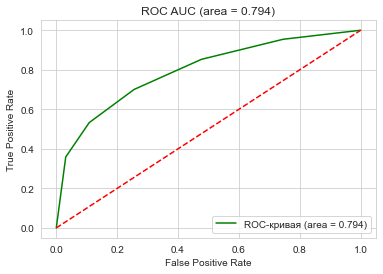

In [16]:
data = pd.read_excel('one_hot_data.xlsx')
df1 = data[data['status'] == 0].head(22000)
df2 = data[data['status'] ==1]
balanced_data = pd.concat([df1, df2])
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop(['status'], axis=1), balanced_data['status'], test_size=0.30, random_state=42, stratify=balanced_data['status']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier() #default neighbors = 5 
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict_proba(X_test_scaled)[:,1]


print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

plot_roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])

In [11]:
report = classification_report(y_test, knn.predict(X_test_scaled), output_dict=True)

In [14]:
df = pd.DataFrame(report).transpose()

In [15]:
df

,precision,recall,f1-score,support
0,0.713435,0.744242,0.728513,6600.00000
1,0.732234,0.700562,0.716047,6589.00000
accuracy,0.722420,0.722420,0.722420,0.72242
macro avg,0.722834,0.722402,0.722280,13189.00000
weighted avg,0.722826,0.722420,0.722286,13189.00000


In [ ]:
print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

In [ ]:
plot_roc_curve(y_test, y_pred)

  0%|          | 0/10 [00:00<?, ?it/s]/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: Fi

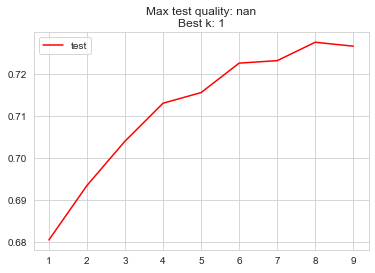

In [20]:
### кроссвалидация на accuracy

from sklearn.model_selection import cross_val_score
from tqdm import tqdm

neighbors = range(10)
accuracy_test = []
for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_test.append(scores.mean())
    
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title(f'Max test quality: {max(accuracy_test):.3f}\nBest k: {np.argmax(accuracy_test)+1}')
plt.legend()
plt.show()

In [21]:
accuracy_test

[nan,
 0.6804770278793395,
 0.6934425721404082,
 0.704003630615977,
 0.713037169196684,
 0.7155716622925207,
 0.7225905205334936,
 0.7231753791857886,
 0.7275621939670842,
 0.7266198548123218]

In [30]:
# learn best k
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=17)

In [31]:
# learn best k
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

y_pred = knn.predict_proba(X_test_scaled)[:,1]
plot_roc_curve(y_test, y_pred)

Train quality:
 Accuracy: 0.764
 Precision: 0.721
 Recall: 0.788
 f1_score: 0.753

Test quality:
 Accuracy: 0.743
 Precision: 0.697
 Recall: 0.767
 f1_score: 0.730


In [34]:
neighbors = range(1, 100)
f1_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
    f1_test.append(scores.mean())
    
plt.plot(neighbors, f1_test, color='red', label='test')
plt.title(f'Max test quality: {max(f1_test):.3f}\nBest k: {np.argmax(f1_test)+1}')
plt.legend()
plt.show()

KeyboardInterrupt: 